# LDA (Linear Discriminant Analysis)
선형 판별 분석법: 분류에서 사용하기 용이하도록 개별 클래스 분별 기준 최대한 유지
클래스 간 분산(between-class scatter), 클래스 내부 분산(within-class scatter) 비율 최대화 방식으로 차원 축소

방식
1. between-class scatter와 within-class scatter를 구함 (개별 feature의 평균 벡터 기반)
2. 내부 분산 행렬과 분산 행렬을 고유벡터로 분해
3. 고유값이 가장 큰 순으로 K개 추출
4. 가장 큰 순으로 추출된 고유벡터를 이용해 입력 데이터 변환

In [1]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

In [2]:
# LDA는 PCA와 다르게 지도학습임
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


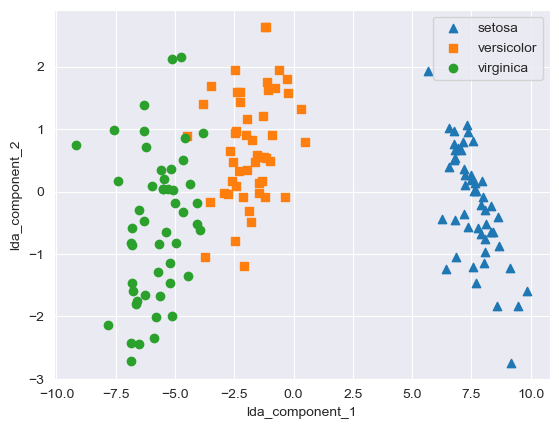

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns = ["lda_component_1", "lda_component_2"]
irisDF_lda = pd.DataFrame(iris_lda, columns=lda_columns)
irisDF_lda["target"] = iris.target

# setosa: triangle, versicolor: rectangle, virginica: circle
markers=['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda["target"] == i]["lda_component_1"]
    y_axis_data = irisDF_lda[irisDF_lda["target"] == i]["lda_component_2"]
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel("lda_component_1")
plt.ylabel("lda_component_2")
plt.show()